In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import re

# Height Classifier

In [2]:
# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "height_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_height = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_height.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_height.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_height"] = y_pred
test_df["Correct"] = test_df["Predicted_height"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_common.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11348\3275663549.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11348\3275663549.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.7463

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.71      0.76      2640
           2       0.72      0.60      0.65      3802
           3       0.73      0.87      0.79      5315

    accuracy                           0.75     11757
   macro avg       0.76      0.73      0.74     11757
weighted avg       0.75      0.75      0.74     11757


🔹 Confusion Matrix:
 [[1868  312  460]
 [ 272 2267 1263]
 [ 122  554 4639]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [3]:


# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_common.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Height"])["Predicted_height"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/height_blr_rural_comparison_15Day.csv", index=False)

# Print the result
print(result)


Predicted_height   Crop_Name  Height    1     2     3
0                   Arecanut    Tall   11    15   611
1                      Avare  Medium   77   458    64
2                      Bajra   Short    3    21    10
3                     Banana    Tall    4    20   214
4                    Coconut    Tall   39    57  1177
5                 Eucalyptus    Tall    0     3     0
6                      Guava    Tall   19    30   333
7                      Jowar  Medium   76   572   301
8                      Lemon    Tall    2     1    11
9                      Maize  Medium   73  1023   809
10                   Mangoes    Tall   29    29   675
11                     Paddy   Short   57     2    52
12                      Ragi   Short  909   222   269
13                   Redgram  Medium   46   214    89
14                      Rose   Short  899    67   129
15                    Sapota    Tall    4     3   188
16                 Sugarcane    Tall   14   396  1430



🔹 Top 10 Important Features:
1. VH_5 (0.0340)
2. VH_7 (0.0324)
3. VH_11 (0.0304)
4. VH_1 (0.0267)
5. VH_4 (0.0238)
6. VH_8 (0.0236)
7. VH_2 (0.0234)
8. VV_7 (0.0215)
9. VH_3 (0.0212)
10. VH_20 (0.0200)


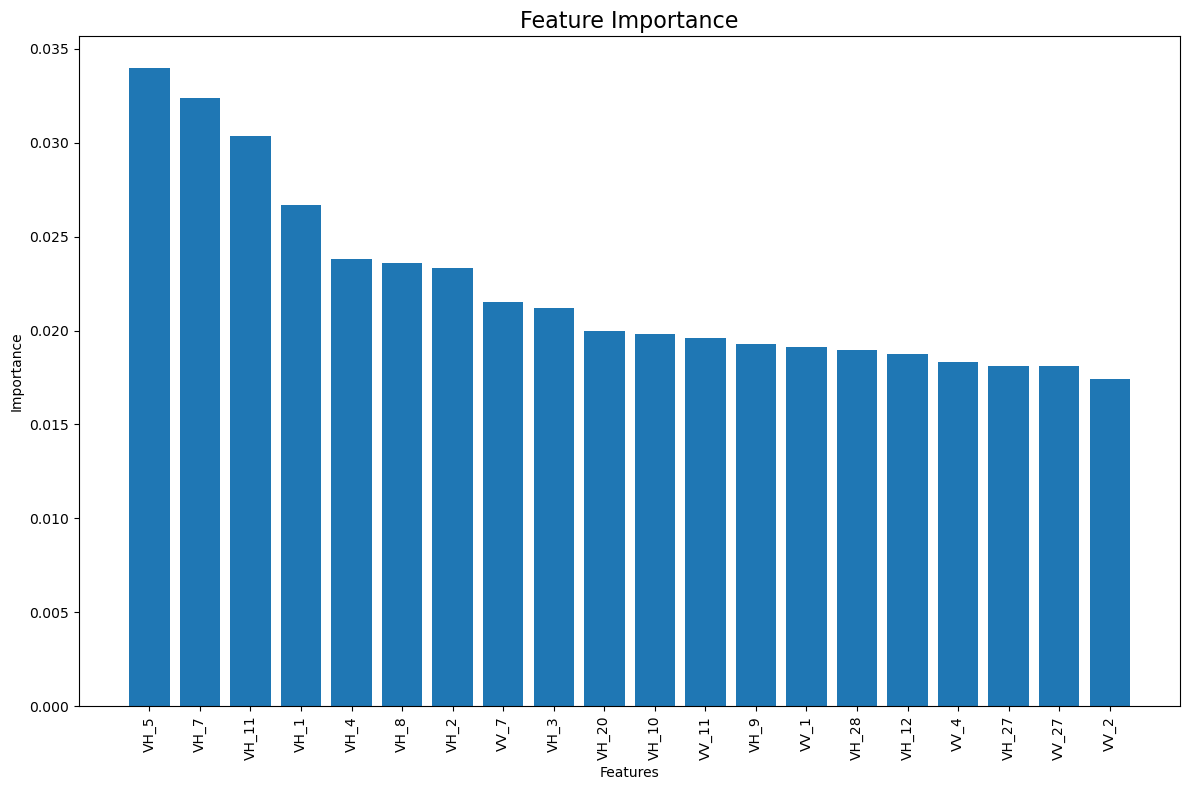

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Feature Importance ---
importances = rf_classifier_height.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Duration Classifier

In [5]:

# Load train and test data
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 

# Define target variable
target_column = "duration_numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_duration = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_duration.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_duration.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_duration"] = y_pred
test_df["Correct"] = test_df["Predicted_duration"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_duration.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11348\66082110.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11348\66082110.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.7399

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.67      0.73      2982
           2       0.73      0.58      0.65      3460
           3       0.72      0.88      0.79      5315

    accuracy                           0.74     11757
   macro avg       0.75      0.71      0.72     11757
weighted avg       0.74      0.74      0.73     11757


🔹 Confusion Matrix:
 [[1996  316  670]
 [ 301 2016 1143]
 [ 184  444 4687]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [6]:
# Load the CSV file
df = pd.read_csv("Results/predictions_blr_krishnagiri_5Day_duration.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Duration"])["Predicted_duration"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Results/duration_blr_rural_comparison.csv", index=False)

# Print the result
print(result)


Predicted_duration   Crop_Name Duration     1    2     3
0                     Arecanut     Long    16   13   608
1                        Avare      Low   473   53    73
2                        Bajra      Low     6   19     9
3                       Banana     Long    15   11   212
4                      Coconut     Long    53   42  1178
5                   Eucalyptus     Long     1    2     0
6                        Guava     Long    34   14   334
7                        Jowar      Low   488  137   324
8                        Lemon     Long     1    1    12
9                        Maize   Medium   168  848   889
10                     Mangoes     Long    35   23   675
11                       Paddy   Medium     6   56    49
12                        Ragi      Low  1029  107   264
13                     Redgram   Medium    76  181    92
14                        Rose   Medium    51  931   113
15                      Sapota     Long     4    4   187
16                   Sugarcane 


🔹 Top 10 Important Features:
1. VH_5 (0.0317)
2. VH_7 (0.0295)
3. VH_11 (0.0293)
4. VH_1 (0.0290)
5. VV_1 (0.0267)
6. VH_2 (0.0248)
7. VH_20 (0.0234)
8. VH_21 (0.0220)
9. VH_8 (0.0219)
10. VH_3 (0.0217)


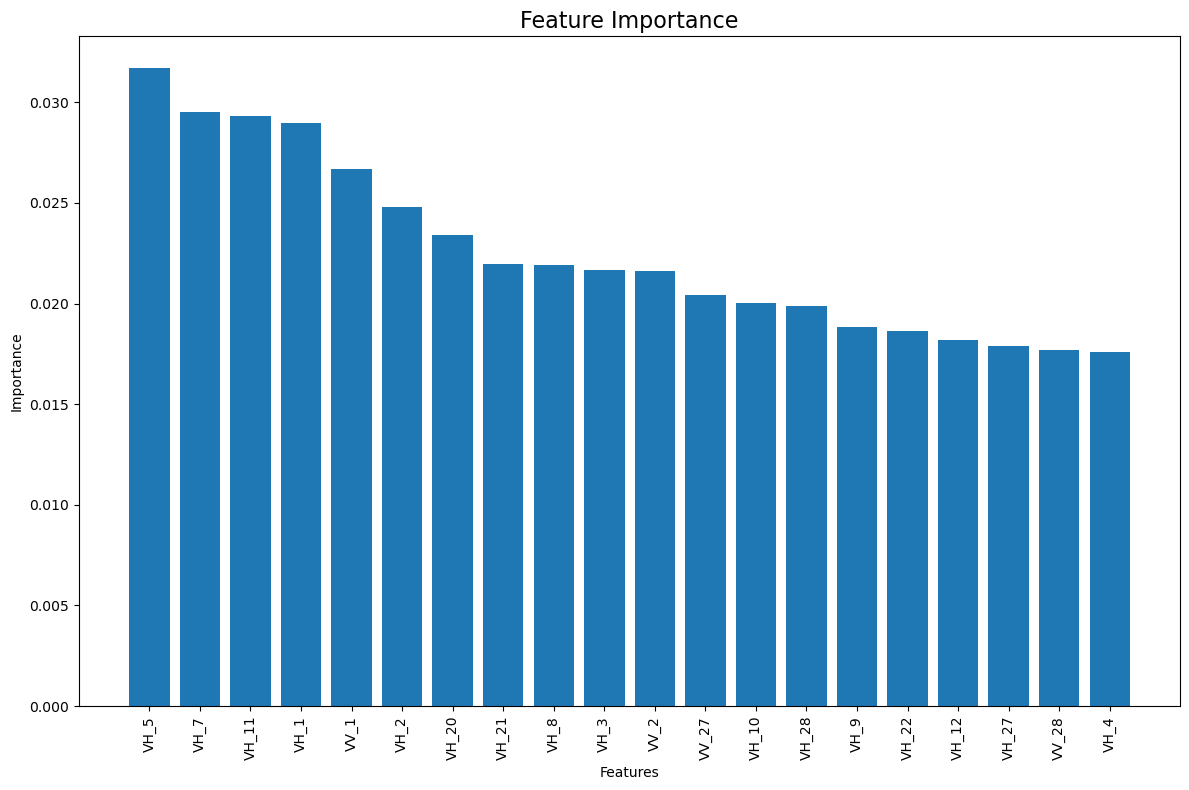

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Feature Importance ---
importances = rf_classifier_duration.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Structure Classifier

In [8]:
train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Test.csv")

# Select feature columns (VV_0...VV_n, VH_0...VH_n)
VV_columns = [col for col in train_df.columns if col.startswith("VV_")]
VH_columns = [col for col in train_df.columns if col.startswith("VH_")]
#NDVI_columns = [col for col in train_df.columns if col.startswith("NDVI_")]
feature_columns = VV_columns + VH_columns 


# Define target variable
target_column = "Structure_Numeric"

# Extract features and labels
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Handle missing values (optional)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Initialize and train RandomForestClassifier
rf_classifier_structure = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_structure.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_structure.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Save predictions to a DataFrame
test_df["Predicted_Structure"] = y_pred
test_df["Correct"] = test_df["Predicted_Structure"] == test_df[target_column]

# Save all predictions
test_df.to_csv("Karnataka_Datasets/Across/S2/Results.csv", index=False)

# Save only misclassified samples for analysis
misclassified_df = test_df[test_df["Correct"] == False]
#misclassified_df.to_csv("Results/misclassified_samples_blr_krishnagiri_5Day_common.csv", index=False)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Misclassified samples saved in 'misclassified_samples.csv'")

C:\Users\prath\AppData\Local\Temp\ipykernel_11348\4017261437.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11348\4017261437.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Accuracy: 0.8438

🔹 Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.83      0.83      3475
           2       0.92      0.64      0.76      2043
           3       0.83      0.92      0.87      6239

    accuracy                           0.84     11757
   macro avg       0.86      0.80      0.82     11757
weighted avg       0.85      0.84      0.84     11757


🔹 Confusion Matrix:
 [[2880   35  560]
 [ 151 1311  581]
 [ 436   73 5730]]

🔹 Misclassified samples saved in 'misclassified_samples.csv'


In [9]:
# Load the CSV file
df = pd.read_csv("Karnataka_Datasets/Across/S2/Results.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "Structure"])["Predicted_Structure"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)


Predicted_Structure   Crop_Name   Structure     1    2     3
0                      Arecanut        Tree   581    4    52
1                         Avare       Shrub    50  343   206
2                         Bajra  Grass Crop     4    0    30
3                        Banana        Tree   166    3    69
4                       Coconut        Tree  1061   12   200
5                    Eucalyptus        Tree     0    0     3
6                         Guava        Tree   292    8    82
7                         Jowar  Grass Crop    88   12   849
8                         Lemon        Tree     9    0     5
9                         Maize  Grass Crop   113   16  1776
10                      Mangoes        Tree   603    6   124
11                        Paddy  Grass Crop    14    0    97
12                         Ragi  Grass Crop   123   44  1233
13                      Redgram       Shrub    61  154   134
14                         Rose       Shrub    40  814   241
15                      


🔹 Top 10 Important Features:
1. VH_4 (0.0408)
2. VV_4 (0.0333)
3. VV_20 (0.0293)
4. VV_16 (0.0280)
5. VH_5 (0.0268)
6. VV_18 (0.0266)
7. VH_12 (0.0265)
8. VV_7 (0.0254)
9. VV_12 (0.0246)
10. VV_26 (0.0218)


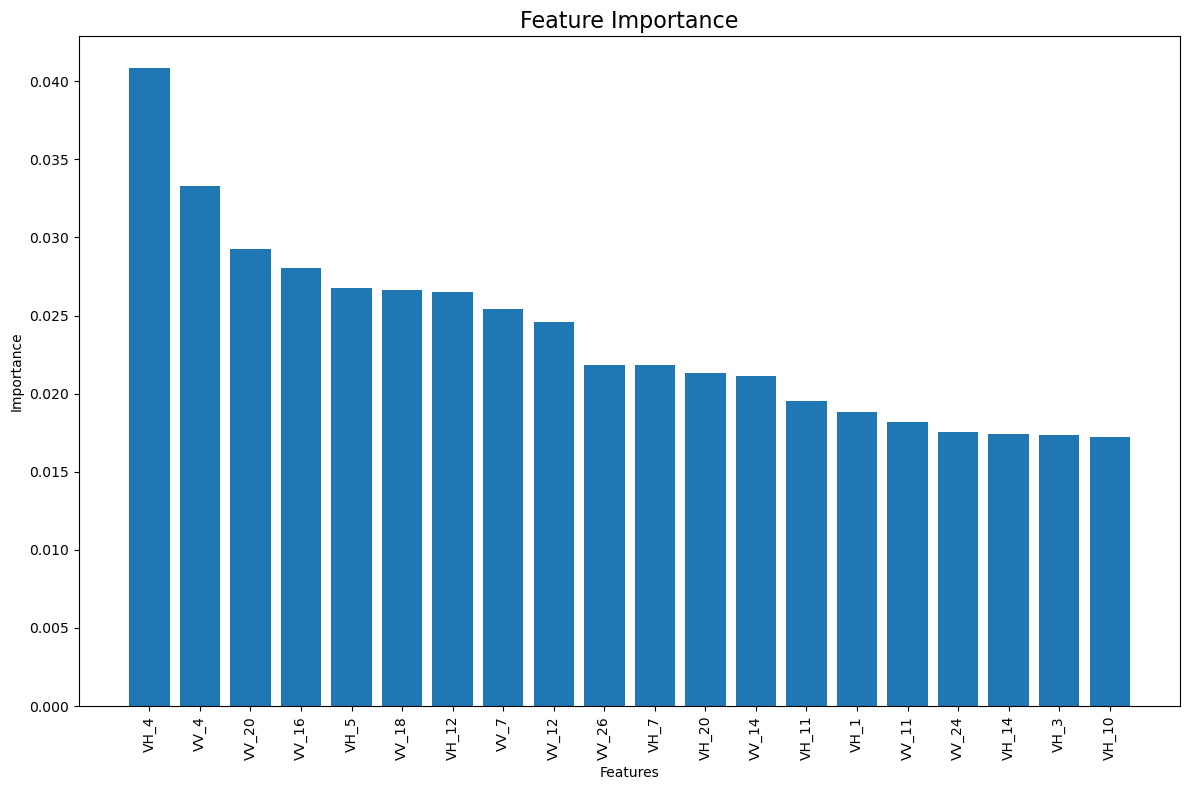

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Feature Importance ---
importances = rf_classifier_structure.feature_importances_
feature_names = feature_columns  # same order as your training

# Sort features by importance
indices = np.argsort(importances)[::-1]  # sort descending
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Print top features
print("\n🔹 Top 10 Important Features:")
for i in range(10):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(len(sorted_importances[:20])), sorted_importances[:20], align="center")
plt.xticks(range(len(sorted_features[:20])), sorted_features[:20], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [38]:
# Group crops by (height, structure, duration) triplet
triplet_to_crops = train_df.groupby(["height_numeric", "Structure_Numeric", "duration_numeric"])["Crop_Name"].unique()

# Print nicely
for triplet, crops in triplet_to_crops.items():
    crops_list = ", ".join(crops)
    print(f"Triplet {triplet}: {crops_list}")


Triplet (1, 2, 2): Rose
Triplet (1, 3, 1): Bajra, Ragi
Triplet (1, 3, 2): Paddy
Triplet (2, 2, 1): Avare
Triplet (2, 2, 2): Redgram
Triplet (2, 3, 1): Jowar
Triplet (2, 3, 2): Maize
Triplet (3, 1, 3): Arecanut, Banana, Coconut, Eucalyptus, Guava, Lemon, Mangoes, Sapota
Triplet (3, 3, 3): Sugarcane


In [11]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------------------
# 1. Load Train/Test Data
# --------------------------------------

train_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Train.csv")
test_df = pd.read_csv("Karnataka_Datasets/Across/Train_Test_Datasets/Combined_Test.csv")

# Extract only VV_i and VH_i features (first 15 VV and 15 VH)
VV_columns = sorted([col for col in train_df.columns if col.startswith("VV_")])
VH_columns = sorted([col for col in train_df.columns if col.startswith("VH_")])
feature_columns = VV_columns + VH_columns

X_train = train_df[feature_columns]
X_test = test_df[feature_columns]

# Fill missing values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# --------------------------------------
# 2. Train three models separately
# --------------------------------------

# Height Model
height_model = RandomForestClassifier(n_estimators=100, random_state=42)
height_model.fit(X_train, train_df["height_numeric"])

# Structure Model
structure_model = RandomForestClassifier(n_estimators=100, random_state=42)
structure_model.fit(X_train, train_df["Structure_Numeric"])

# Duration Model
duration_model = RandomForestClassifier(n_estimators=100, random_state=42)
duration_model.fit(X_train, train_df["duration_numeric"])

# --------------------------------------
# 3. Predict using the three models
# --------------------------------------

height_pred = height_model.predict(X_test)
structure_pred = structure_model.predict(X_test)
duration_pred = duration_model.predict(X_test)

# Add predictions to test_df
test_df["pred_height"] = height_pred
test_df["pred_structure"] = structure_pred
test_df["pred_duration"] = duration_pred

# --------------------------------------
# 4. Define Grouped Triplet Mapping
# --------------------------------------

triplet_mapping = {
    (1, 3, 1): "Millets",    # Bajra, Ragi
    (3, 1, 3): "Tree",  # Arecanut, Banana, Coconut, Eucalyptus, Guava, Lemon, Mangoes, Sapota
    (2, 2, 1): "Avare",
    (2, 3, 1): "Jowar",
    (2, 3, 2): "Maize",
    (1, 3, 2): "Paddy",
    (2, 2, 2): "Redgram",
    (1, 2, 2): "Rose",
    (3, 3, 3): "Sugarcane",
}

def lookup_crop(height, structure, duration):
    key = (height, structure, duration)
    return triplet_mapping.get(key, "Ambiguous")  # fallback if key not found

# Apply lookup
test_df["predicted_crop"] = test_df.apply(
    lambda row: lookup_crop(row["pred_height"], row["pred_structure"], row["pred_duration"]),
    axis=1
)

# --------------------------------------
# 5. Remap Ground Truth Also (Optional but Important)
# --------------------------------------

# Create manual mapping for ground truth Crop_Names to group names
ground_truth_mapping = {
    "Bajra": "Millets",
    "Ragi": "Millets",
    "Jowar": "Jowar",
    "Maize": "Maize",
    "Paddy": "Paddy",
    "Redgram": "Redgram",
    "Rose": "Rose",
    "Sugarcane": "Sugarcane",
    "Avare": "Avare",
    "Arecanut": "Tree",
    "Banana": "Tree",
    "Coconut": "Tree",
    "Eucalyptus": "Tree",
    "Guava": "Tree",
    "Lemon": "Tree",
    "Mangoes": "Tree",
    "Sapota": "Tree",
}

# Remap true labels
test_df["true_crop_grouped"] = test_df["Crop_Name"].map(ground_truth_mapping).fillna("Unknown")

# --------------------------------------
# 6. Evaluate
# --------------------------------------

# Basic accuracy (strict)
crop_accuracy = (test_df["predicted_crop"] == test_df["true_crop_grouped"]).mean()

print(f"🔹 Overall Crop Prediction Accuracy: {crop_accuracy:.4f}")

# Save for inspection
test_df.to_csv("Results/final_predictions_combined_model.csv", index=False)

# See confusion matrix
print("\n🔹 Confusion Matrix (Strict):")
print(confusion_matrix(test_df["true_crop_grouped"], test_df["predicted_crop"]))

print("\n🔹 Classification Report (Strict):")
print(classification_report(test_df["true_crop_grouped"], test_df["predicted_crop"]))


C:\Users\prath\AppData\Local\Temp\ipykernel_11348\1004562807.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\prath\AppData\Local\Temp\ipykernel_11348\1004562807.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.mean(), inplace=True)


🔹 Overall Crop Prediction Accuracy: 0.6286

🔹 Confusion Matrix (Strict):
[[   0    0    0    0    0    0    0    0    0    0]
 [  44  324   71   26   51    9   11    6   21   36]
 [  91    4  398  108   66    9    4    2  193   74]
 [ 269    9   79  748   61   17    7    2  599  114]
 [  96   20  114   58  860   33   12   12  121  108]
 [  12    0    2    1    5   52    0    0   23   16]
 [  23   13   34   23   28    9  140    1   27   51]
 [  78    3   21   20   21   80    6  785   46   35]
 [ 231    0   19  245    4    6    1    0 1243   91]
 [ 131   11   43   40   63   23   12    3  308 2841]]

🔹 Classification Report (Strict):
              precision    recall  f1-score   support

   Ambiguous       0.00      0.00      0.00         0
       Avare       0.84      0.54      0.66       599
       Jowar       0.51      0.42      0.46       949
       Maize       0.59      0.39      0.47      1905
     Millets       0.74      0.60      0.66      1434
       Paddy       0.22      0.47   

C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Load the CSV file
df = pd.read_csv("Results/final_predictions_combined_model.csv")

# Group by Crop_Name and count occurrences of (duration_numeric, predicted_Duration)
result = df.groupby(["Crop_Name", "true_crop_grouped"])["predicted_crop"].value_counts().unstack(fill_value=0)

# Reset index for better readability
result = result.reset_index()

# Save the output as CSV
#result.to_csv("Karnataka_Datasets/Across/Pred.csv", index=False)

# Print the result
print(result)


predicted_crop   Crop_Name true_crop_grouped  Ambiguous  Avare  Jowar  Maize  \
0                 Arecanut              Tree         11      1      5      1   
1                    Avare             Avare         44    324     71     26   
2                    Bajra           Millets          1      0      5     16   
3                   Banana              Tree         15      2      4      6   
4                  Coconut              Tree         54      1     12     10   
5               Eucalyptus              Tree          0      0      0      3   
6                    Guava              Tree         20      5     12      9   
7                    Jowar             Jowar         91      4    398    108   
8                    Lemon              Tree          0      0      0      1   
9                    Maize             Maize        269      9     79    748   
10                 Mangoes              Tree         26      2      9      7   
11                   Paddy             P